In [27]:
!pip install -r requirements.txt
!jupyter nbextension install --py --sys-prefix keplergl # can be skipped for notebook 5.3 and above
!jupyter nbextension enable --py --sys-prefix keplergl # can be skipped for notebook 5.3 and above
!jupyter labextension install @jupyter-widgets/jupyterlab-manager keplergl-jupyter


Installing /mnt/e/Documents/pruebas/New-York-City-Taxi-Fare-Prediction/env/lib/python3.8/site-packages/keplergl/static -> keplergl-jupyter
Up to date: /mnt/e/Documents/pruebas/New-York-City-Taxi-Fare-Prediction/env/share/jupyter/nbextensions/keplergl-jupyter/extension.js
Up to date: /mnt/e/Documents/pruebas/New-York-City-Taxi-Fare-Prediction/env/share/jupyter/nbextensions/keplergl-jupyter/extension.js.map
Up to date: /mnt/e/Documents/pruebas/New-York-City-Taxi-Fare-Prediction/env/share/jupyter/nbextensions/keplergl-jupyter/index.js
Up to date: /mnt/e/Documents/pruebas/New-York-City-Taxi-Fare-Prediction/env/share/jupyter/nbextensions/keplergl-jupyter/index.js.map
Up to date: /mnt/e/Documents/pruebas/New-York-City-Taxi-Fare-Prediction/env/share/jupyter/nbextensions/keplergl-jupyter/keplergl.html
Up to date: /mnt/e/Documents/pruebas/New-York-City-Taxi-Fare-Prediction/env/share/jupyter/nbextensions/keplergl-jupyter/main.js
- Validating: OK

    To initialize this nbextension in the browser

In [25]:
import pandas as pd
import geopandas


In [ ]:

from plotnine import *
import seaborn as sns

# model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor


In [3]:
df = pd.read_csv("data/train_sample_clean_prepared.csv")

In [4]:
df

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
0,10.90,2011,19,5,10,-73.972253,40.746463,-73.955485,40.764362,5,2.44
1,37.50,2014,26,3,22,-74.008180,40.707032,-73.928460,40.853647,1,17.63
2,5.70,2012,27,6,18,-73.994439,40.734462,-74.007644,40.740937,1,1.33
3,6.50,2013,39,3,21,-73.996230,40.753520,-73.987592,40.770522,1,2.03
4,5.30,2009,41,7,22,-73.989362,40.726397,-73.997931,40.719469,1,1.06
...,...,...,...,...,...,...,...,...,...,...,...
548775,5.70,2010,12,1,9,-73.982407,40.774540,-73.981533,40.759639,1,1.66
548776,33.83,2013,19,2,0,-73.863798,40.769201,-73.970943,40.798694,1,9.60
548777,4.10,2010,50,4,20,-74.008525,40.734195,-74.003213,40.735595,2,0.47
548778,37.00,2014,47,2,23,-73.953675,40.763757,-73.935610,40.671752,3,10.34


In [ ]:
# est va en clean
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df["pickup_datetime"] = df['pickup_datetime'].apply(lambda x: x.weekofyear)
df

C:\Users\vocho\AppData\Local\Temp\ipykernel_15660\3804150831.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-05-13 10:15:00.00000099,10.90,19,-73.972253,40.746463,-73.955485,40.764362,5
1,2014-06-25 22:25:00.00000061,37.50,26,-74.008180,40.707032,-73.928460,40.853647,1
2,2012-07-07 18:20:23.0000001,5.70,27,-73.994439,40.734462,-74.007644,40.740937,1
3,2013-09-25 21:57:00.00000071,6.50,39,-73.996230,40.753520,-73.987592,40.770522,1
4,2009-10-11 22:44:25.0000004,5.30,41,-73.989362,40.726397,-73.997931,40.719469,1
...,...,...,...,...,...,...,...,...
559995,2010-03-22 09:35:02.0000002,5.70,12,-73.982407,40.774540,-73.981533,40.759639,1
559996,2013-05-07 00:01:50.0000003,33.83,19,-73.863798,40.769201,-73.970943,40.798694,1
559997,2010-12-16 20:04:00.000000179,4.10,50,-74.008525,40.734195,-74.003213,40.735595,2
559998,2014-11-18 23:06:00.000000164,37.00,47,-73.953675,40.763757,-73.935610,40.671752,3


In [5]:
df.dtypes

fare_amount          float64
pickup_year            int64
pickup_week            int64
pickup_day_week        int64
pickup_hour            int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dist_points_km       float64
dtype: object

In [6]:
# NAs per column
df.isnull().sum()

fare_amount            0
pickup_year            0
pickup_week            0
pickup_day_week        0
pickup_hour            0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude      0
dropoff_latitude       0
passenger_count        0
dist_points_km       146
dtype: int64

In [8]:
# Al ser solo 6 NA no representa un riesgo eliminar
# Drop NAs
data = df.dropna().copy()
data.isnull().values.any()

False

In [10]:
data.shape

(548634, 11)

# EDA

In [13]:
data.describe()

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
count,548634.000000,548634.000000,548634.000000,548634.000000,548634.000000,548634.000000,548634.000000,548634.000000,548634.000000,548634.000000,548634.000000
mean,11.314671,2011.736471,25.512852,4.035607,13.509609,-73.975191,40.749712,-73.911920,40.719867,1.684329,10.671566
std,9.689509,1.861466,14.928995,1.948966,6.517662,0.041330,0.221515,2.143428,1.135357,1.308686,245.945550
min,-49.570000,2009.000000,1.000000,1.000000,0.000000,-76.416667,0.000000,-95.650000,0.000000,0.000000,0.000000
25%,6.000000,2010.000000,13.000000,2.000000,9.000000,-73.992230,40.736495,-73.991563,40.735528,1.000000,1.250000
50%,8.500000,2012.000000,24.000000,4.000000,14.000000,-73.982085,40.753300,-73.980570,40.753829,1.000000,2.160000
75%,12.500000,2013.000000,39.000000,6.000000,19.000000,-73.968287,40.767547,-73.965207,40.768403,2.000000,3.910000
max,500.000000,2015.000000,53.000000,7.000000,23.000000,-72.084310,50.974646,0.002010,73.995127,6.000000,8677.360000


In [ ]:
data.describe(include=[object])

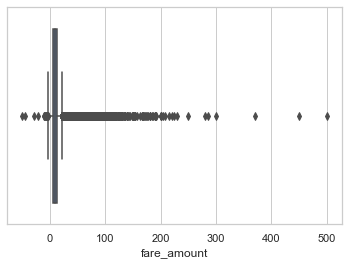

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["fare_amount"])

Lo que primero llama la atención es que en tarifa tenermos valores negativos, son descuentos?

In [15]:
data

,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km
0,10.90,2011,19,5,10,-73.972253,40.746463,-73.955485,40.764362,5,2.44
1,37.50,2014,26,3,22,-74.008180,40.707032,-73.928460,40.853647,1,17.63
2,5.70,2012,27,6,18,-73.994439,40.734462,-74.007644,40.740937,1,1.33
3,6.50,2013,39,3,21,-73.996230,40.753520,-73.987592,40.770522,1,2.03
4,5.30,2009,41,7,22,-73.989362,40.726397,-73.997931,40.719469,1,1.06
...,...,...,...,...,...,...,...,...,...,...,...
548775,5.70,2010,12,1,9,-73.982407,40.774540,-73.981533,40.759639,1,1.66
548776,33.83,2013,19,2,0,-73.863798,40.769201,-73.970943,40.798694,1,9.60
548777,4.10,2010,50,4,20,-74.008525,40.734195,-74.003213,40.735595,2,0.47
548778,37.00,2014,47,2,23,-73.953675,40.763757,-73.935610,40.671752,3,10.34


In [26]:
# Load an empty map
from keplergl import KeplerGl
map_1 = KeplerGl()
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [16]:
path_to_data = geopandas.datasets.get_path("nybb")
#gdf = geopandas.read_file(path_to_data)
df = pd.read_csv("data/train_sample_clean_prepared.csv")

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.pickup_longitude, df.pickup_latitude))

gdf_2 = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.dropoff_longitude, df.dropoff_latitude))

gdf.head()

gdf_2.head()




,fare_amount,pickup_year,pickup_week,pickup_day_week,pickup_hour,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_points_km,geometry
0,10.9,2011,19,5,10,-73.972253,40.746463,-73.955485,40.764362,5,2.44,POINT (-73.95548 40.76436)
1,37.5,2014,26,3,22,-74.008180,40.707032,-73.928460,40.853647,1,17.63,POINT (-73.92846 40.85365)
2,5.7,2012,27,6,18,-73.994439,40.734462,-74.007644,40.740937,1,1.33,POINT (-74.00764 40.74094)
3,6.5,2013,39,3,21,-73.996230,40.753520,-73.987592,40.770522,1,2.03,POINT (-73.98759 40.77052)
4,5.3,2009,41,7,22,-73.989362,40.726397,-73.997931,40.719469,1,1.06,POINT (-73.99793 40.71947)


In [18]:
config = {
'version': 'v1',
'config': {
    'mapState': {
        'latitude': 40.75,
        'longitude': -74,
        'zoom': 10
    }
}
}

map_2 = KeplerGl(height=600, data={"data_1": gdf[1:2000]}, config = config)
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 40.75, 'longitude': -74, 'zoom': 10}}}, …

In [89]:
# Save map_1 config to a file
with open('hex_config.py', 'w') as f:
   f.write('config = {}'.format(map_2.config))


In [90]:

%run hex_config.py

In [21]:
map_2 = KeplerGl(height=600, data={"data_1": gdf[1:2000]}, config = config)
map_2

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'mapState': {'latitude': 40.75, 'longitude': -74, 'zoom': 10}}}, …

In [20]:
KeplerGl().save_to_html(file_name='first2_map.html', data={"data_1": gdf[1:2000]}, config = config)



User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
Map saved to first2_map.html!
